# 6.5 Unsupervised Machine Learning

## This notebook contains:

### 1. Importing libraries and data 
### 2. The elbow technique
### 3. k-means clustering

####  1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [3]:
#Ensuring matplotlib display of graphs
%matplotlib inline

In [4]:
path = 'C:/Users/C SaiVishwanath/Documents/CF/Data Immersion/Achievement 6'

In [5]:
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared', '130425_mass_shoot_merged_derived_ver2.csv'), index_col = False, encoding='latin1')

In [6]:
df.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Incident_ID,Date,Year,Month,State,City,...,State_ID,State_y,County,Lat,Long,Population,Shootings_County,Shootings_State,Total_Harmed_Victims,Any_Suspect_Arrested
0,0,0,0,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,...,TN,Tennessee,Shelby,35.1087,-89.9663,0.0,3,30,6,No
1,1,1,1,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,...,FL,Florida,Manatee,27.5435,-82.5608,0.0,3,30,6,No
2,2,2,2,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,...,TX,Texas,Hall,34.7268,-100.5416,0.0,3,30,6,No
3,3,3,3,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,...,MO,Missouri,Scotland,40.4613,-92.1704,0.0,3,30,6,No
4,4,4,4,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,...,MI,Michigan,Macomb,42.8956,-82.7689,0.0,3,30,6,No


In [7]:
# Drop all columns with 'Unnamed' in their name
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
df.head()

,Incident_ID,Date,Year,Month,State,City,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,...,State_ID,State_y,County,Lat,Long,Population,Shootings_County,Shootings_State,Total_Harmed_Victims,Any_Suspect_Arrested
0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,...,TN,Tennessee,Shelby,35.1087,-89.9663,0.0,3,30,6,No
1,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,...,FL,Florida,Manatee,27.5435,-82.5608,0.0,3,30,6,No
2,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,...,TX,Texas,Hall,34.7268,-100.5416,0.0,3,30,6,No
3,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,...,MO,Missouri,Scotland,40.4613,-92.1704,0.0,3,30,6,No
4,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,...,MI,Michigan,Macomb,42.8956,-82.7689,0.0,3,30,6,No


In [9]:
#Saving without indexes
df.to_csv(os.path.join(path, '02_Data', 'Prepared', '130425_mass_shoot_merged_derived_ver3.csv'), index=False)

#### 2. Elbow technique

In [11]:
#Defining range of potential clusters
num_cl = range(1, 10) 
#Defining k-means clusters in assigned range
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
#Creating score representing rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

ValueError: could not convert string to float: '2025-04-09'

In [ ]:
#Selecting only numeric columns
df_numeric = df.select_dtypes(include=['number'])

In [ ]:
#Retrying scores
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

score

In [ ]:
#Plotting elbow
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
#Result: 6 clusters

##### Interpretation

The k-means clustering will use 6 clusters. As shown by the elbow above, 6 is the inflection point where the curve plateaus. However, there will be two iterations, one with 6 and one with 4 clusters because the increment between 4 and 6 before the curve plateaus for good might be marginal. 

#### 3. k-means clustering

In [ ]:
#Creating k-means object
kmeans = KMeans(n_clusters = 6) 

In [ ]:
#Fitting k-means object to data
kmeans.fit(df_numeric)

In [ ]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

In [ ]:
df_numeric.head()

In [ ]:
df_numeric['clusters'].value_counts()

In [ ]:
#Plotting clusters for 'Total_Guns_Sold' and 'Shootings_County' 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Total_Guns_Sold'], y=df_numeric['Shootings_County'], hue=kmeans.labels_, s=100) 

#Removing grid
ax.grid(False) 

#Labels 
plt.xlabel('Total Guns Sold') 
plt.ylabel('Shootings per County') 
plt.show()

##### Interpretation

As consistently seen with other visualizations and analysis methods, there is no visible trend between the amount of guns sold and shootings. If anything, it further supports the inference that shootings are not related to the number, but rather the presence of a gun in general. 

In terms of the effectiveness of the k-means, the chart shows that indeed, it is necessary to run an iteration with 4 clusters, as most points are categorized between 3 and 4. 

#### Second k-means iteration

In [ ]:
#Creating k-means object
kmeans_2 = KMeans(n_clusters = 4) 

In [ ]:
#Fitting k-means object to data
kmeans_2.fit(df_numeric)

In [ ]:
df_numeric['clusters'] = kmeans_2.fit_predict(df_numeric)

In [ ]:
df_numeric.head()

In [17]:
df_numeric['clusters'].value_counts()

NameError: name 'df_numeric' is not defined

In [ ]:
#Plotting clusters for 'Total_Guns_Sold' and 'Shootings_County' 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['Total_Guns_Sold'], y=df_numeric['Shootings_County'], hue=kmeans_2.labels_, s=100) 

#Removing grid
ax.grid(False) 

#Labels 
plt.xlabel('Total Guns Sold') 
plt.ylabel('Shootings per County') 
plt.show()

In [ ]:
df_numeric.loc[df_numeric['clusters'] == 3, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'pink'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'beige'

In [ ]:
df_numeric.groupby('cluster').agg({'Total_Guns_Sold':['mean', 'median'], 
                         'Shootings_County':['mean', 'median'], 
                        })

##### Interpretation

The clustering still does not seem to show a significant pattern. However, we can infer the following from these two iterations:

Each point represents the number of guns sold and shootings per county. As seen on the chart, most of the points concentrate in the bottom left quadrant of the chart: low shootings, low gun sales. The counties with a high shooting incidence are mostly aligned in the top left quadrant: high shootings, low sales. This can be interpreted as the fact that high gun violence incidence is more related to population density, for example. While counties that have higher gun sales but low shootings might mostly be rural counties. 

#### Iteration 3 of k-means: Shootings vs population per state 

##### Elbow technique

In [24]:
#Defining range of potential clusters
num_cl = range(1, 10) 
#Defining k-means clusters in assigned range
kmeans_3 = [KMeans(n_clusters=i) for i in num_cl]

In [26]:
#Creating score representing rate of variation for the given cluster option
score = [kmeans_3[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans_3))]

NameError: name 'df_numeric' is not defined

In [28]:
df_numeric.head()

NameError: name 'df_numeric' is not defined

In [30]:
#Selecting only numeric columns
df_numeric2 = df.select_dtypes(include=['number'])

In [32]:
#Creating score representing rate of variation for the given cluster option
score = [kmeans_3[i].fit(df_numeric2).score(df_numeric2) for i in range(len(kmeans_3))]

score

[-1.4965449767323626e+17,
 -8.614155130524586e+16,
 -5.009190916110986e+16,
 -2.398722502873023e+16,
 -1.7227642273709256e+16,
 -1.2748330817818042e+16,
 -1.1546691821447932e+16,
 -1.0023782092634188e+16,
 -7526280364041534.0]

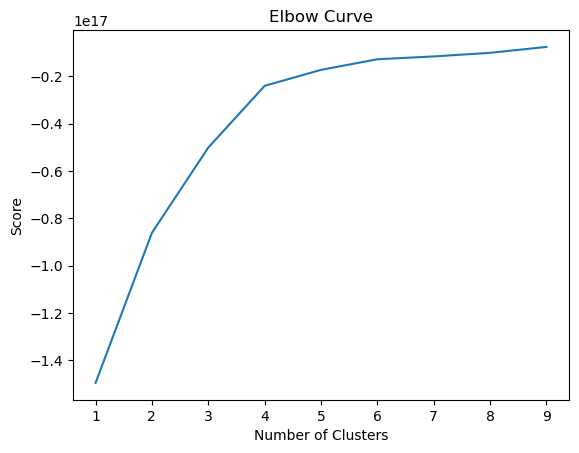

In [33]:
#Plotting elbow
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [34]:
#Creating k-means object
kmeans_3 = KMeans(n_clusters = 4)

##### Interpretation

Learning from previous iterations, we will perform this 3rd iteration with n_clusters=4 because it seemed to yield better results. 

In [37]:
#Fitting k-means object to data
kmeans_3.fit(df_numeric2)

KMeans(n_clusters=4)

In [38]:
df_numeric2['clusters'] = kmeans_3.fit_predict(df_numeric2)

In [40]:
df_numeric2.head()

,Incident_ID,Year,Month,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested,Handguns_Sold,Long_Guns_Sold,Total_Guns_Sold,Lat,Long,Population,Shootings_County,Shootings_State,Total_Harmed_Victims,clusters
0,3181158,2025,4,1,5,0,0,0,0.0,0.0,0.0,35.1087,-89.9663,0.0,3,30,6,2
1,3181158,2025,4,1,5,0,0,0,0.0,0.0,0.0,27.5435,-82.5608,0.0,3,30,6,2
2,3181158,2025,4,1,5,0,0,0,0.0,0.0,0.0,34.7268,-100.5416,0.0,3,30,6,2
3,3181158,2025,4,1,5,0,0,0,0.0,0.0,0.0,40.4613,-92.1704,0.0,3,30,6,2
4,3181158,2025,4,1,5,0,0,0,0.0,0.0,0.0,42.8956,-82.7689,0.0,3,30,6,2


In [42]:
df_numeric2['clusters'].value_counts()

clusters
0    33121
2    30004
3     1321
1       82
Name: count, dtype: int64

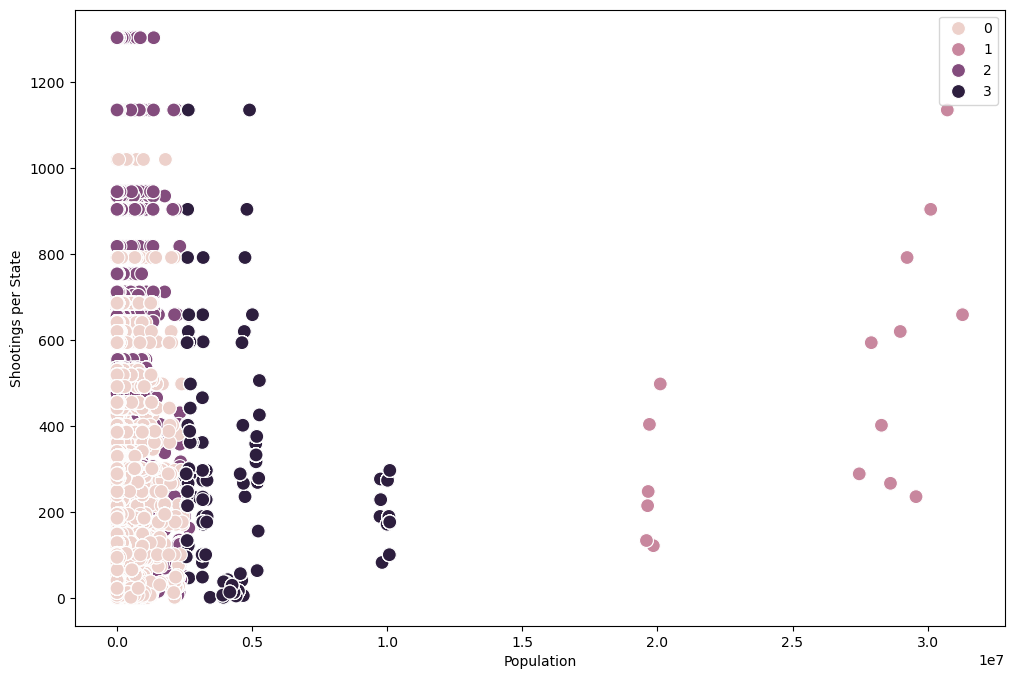

In [44]:
#Plotting clusters for 'Total_Guns_Sold' and 'Shootings_County' 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric2['Population'], y=df_numeric2['Shootings_State'], hue=kmeans_3.labels_, s=100) 

#Removing grid
ax.grid(False) 

#Labels 
plt.xlabel('Population') 
plt.ylabel('Shootings per State') 
plt.show()


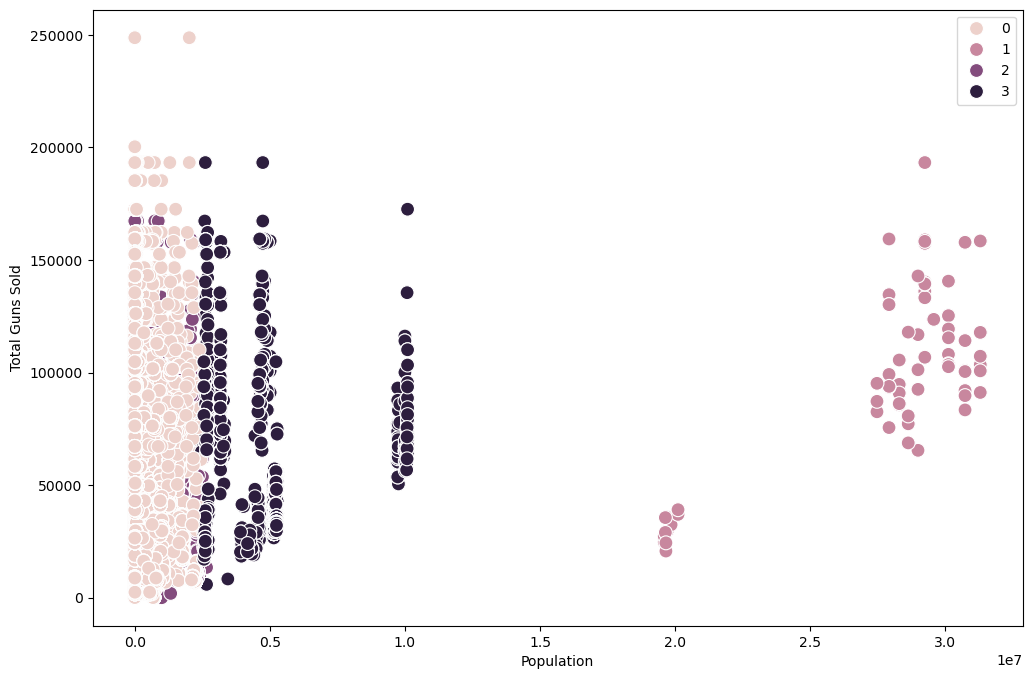

In [45]:
#Plotting clusters for 'Total_Guns_Sold' and 'Shootings_County' 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric2['Population'], y=df_numeric2['Total_Guns_Sold'], hue=kmeans_3.labels_, s=100) 

#Removing grid
ax.grid(False) 

#Labels 
plt.xlabel('Population') 
plt.ylabel('Total Guns Sold') 
plt.show()

In [46]:
df_numeric2.loc[df_numeric2['clusters'] == 3, 'cluster'] = 'dark purple'
df_numeric2.loc[df_numeric2['clusters'] == 2, 'cluster'] = 'purple'
df_numeric2.loc[df_numeric2['clusters'] == 1, 'cluster'] = 'pink'
df_numeric2.loc[df_numeric2['clusters'] == 0, 'cluster'] = 'beige'

In [51]:
df_numeric2.groupby('cluster').agg({'Shootings_State':['mean', 'median'],  
                         'Population':['mean', 'median'], 
                         'Total_Guns_Sold':['mean', 'median']
                        })

Shootings_State           Population             Total_Guns_Sold  \
                       mean median          mean      median            mean   
cluster                                                                        
beige            342.787174  301.0  1.989523e+05     27747.0    47498.433743   
dark purple      322.982589  288.0  4.737744e+06   5142522.0    61487.130204   
pink             645.097561  620.0  2.809338e+07  29239570.0   102372.256098   
purple           505.469537  404.0  9.905990e+04     19390.0    43491.354786   

                       
               median  
cluster                
beige         37424.0  
dark purple   51505.0  
pink         103043.5  
purple        36428.0

##### Interpretation

Integrating the variable of population and aggregating the scatterplots by state instead of county, trends are more clearly appreciated. We see that indeed, there might be a relationship with population or population density in the case of more densely populated states. There seems to be a threshhold of number of guns and mass shooting incidents. This same threshhold is appreciated in states with less population, although wider. Where the threshhold of guns vs. population in densely populated states where the incident happened oscilates roughly between 50k and 150k guns sold, in states with lower population, the threshhold is between 0 and 200k guns sold. Most of the events conglomerate toward low-population, which might indicate that these shootings occur either in rural or sprawled communities. 

##### Further steps

The next step in the analytical pipeline would be to delve deeper into this relationship between population and the events, as well as exploring correlations that appeared in previous steps but that seemed secondary (the correlation between types of guns sold, and between county and state). 

In [60]:
dups = df_numeric2.duplicated()
dups.sum()

16157